
# Logistická regrese


## Model pro binární klasifikaci

Uvažme binární vysvětlovanou proměnnou $Y$ s hodnotami $0$ a $1$ a $p$ příznaků $X_1, X_2, \ldots, X_p$ s konstantním $X_0 = 1$.

* Namísto hodnoty vysvětlované proměnné $Y \in \{0,1\}$ se snažíme predikovat pravděpodobnost, že při zadaných hodnotách příznaků $X_i$ má $Y$ hodnotu $1$, tj. číslo $P(Y = 1 \mid \vec{x},\vec{w})$ kde $\vec{w}$ je vektor parametrů modelu.
* Pro dané hodnoty $\vec{x}^T = (x_0, x_1, \ldots, x_p)$ a koeficienty $\vec{w}^T = (w_0, w_1, \ldots, w_p)$ má model tvar
$$
P(Y = 1 \mid \vec{x},\vec{w}) = \frac{e^{\vec{w}^T \vec{x}}}{1 + e^{\vec{w}^T \vec{x}}}.
$$
* Je-li $P(Y = 1 \mid \vec{x},\vec{w})$ větší než $\frac{1}{2}$, rozhodneme se pro $Y = 1$, je-li menší než $\frac{1}{2}$, pro $Y = 0$.

## Sigmoida (standardní logistická funkce)

$$
f(x) = \frac{e^x}{1 + e^x} = \frac{1}{1 + e^{-x}}, \qquad D_f = \mathbb{R}, \qquad H_f = (0,1).
$$

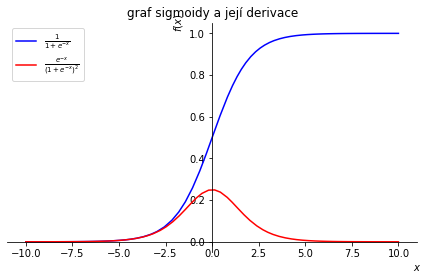

In [1]:
from sympy import *
x = symbols('x'); a = 10;

f = 1/(1+exp(-x)) # sigmoida
df = diff(f,x) # derivace sigmoidy

p1 = plot(f,(x,-a,a), line_color = 'b', title = 'graf sigmoidy a její derivace', legend = ['f(x)'],show = False, )
p2 = plot(df,(x,-a,a),line_color= 'r',legend = ['df(x)'], show = False)
p1.extend(p2)
p1.show()

Limity v $\pm \infty$:
$$ \lim_{x \to +\infty} f(x) = 1, \qquad \lim_{x \to -\infty} f(x) = 0$$

In [2]:
display(limit(f,x,oo))
display(limit(f,x,-oo))

1

0

Rovnice $f(x) = \frac{1}{2}$ má jediné řešení $x = 0$.

In [3]:
solve(f-1/2,x)

[0.0]

Derivace v $0$ je $f'(0) = \frac{1}{4}$. Rovnice tečny v bodě nula je $y = f(0) + f'(0)(x-0)=\frac{x}{4} + \frac{1}{2}$.

In [4]:
print('Rovnice tečny v bodě 0:')
display(f.subs(x,0) + df.subs(x,0)*(x))

Rovnice tečny v bodě 0:


x/4 + 1/2

## Rozhodovací hranice

Z vlastností sigmoidy plyne, že rozhodovací hranice
$$
P(Y = 1 \mid \vec{x},\vec{w}) = \frac{e^{\vec{w}^T \vec{x}}}{1 + e^{\vec{w}^T \vec{x}}} = \frac{1}{2}
$$
je nadrovina
$$
\vec{w}^T \vec{x} = w_0 x_0 + w_1 x_1 + \cdots + w_p x_p = 0,
$$
v prostoru $\mathbb{R}^p$.

## Umělá data

  * Vygenerujeme si umělá data se dvěma příznaky $X_0$ a $X_1$ a binární vysvětlovanou proměnnou.
  * Je to směs dvou dvourozměrných Gaussiánů.


In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from matplotlib.colors import ListedColormap
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.8/dist-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/usr/local/lib/python3.8/dist-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [3]:
mean1 = [-20, 20]; cov1 = [[3000, 850], [850, 1000]];
mean2 = [10, -10]; cov2 = [[3000, 850], [850, 1000]];
n1 = 70; n2 = 70;
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

np.random.seed(50)  # zajistí replikovatelnost
X1 = np.random.multivariate_normal(mean1, cov1, n1)
y1 = np.zeros(n1,dtype="int")
X2 = np.random.multivariate_normal(mean2, cov2, n2)
y2 = np.ones(n2,dtype="int")

X = np.concatenate((X1,X2), axis=0)
y = np.concatenate((y1,y2), axis=0)

# zobrazení velikosti výsledných dat
print(X.shape)

(140, 2)


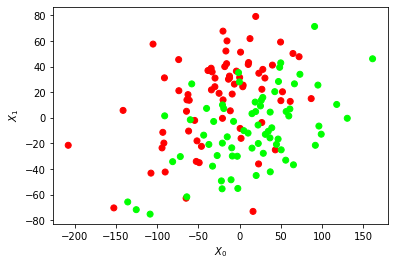

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlabel('$X_0$')
plt.ylabel('$X_1$')
plt.show()

### KNN

  * Použijeme pro srovnání KNN, které známe, a ukážeme si, jak vypadá hranice, kde se mění rozhodnutí.

In [5]:
from sklearn import neighbors

h = 0.2  # step size in the mesh
n_neighbors = 5

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])

def plotkNN(weights):
    # we create an instance of Neighbours Classifier and fit the data.
    clfKNN = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clfKNN.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clfKNN.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(6,6))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel('$X_0$')
    plt.ylabel('$X_1$')
    plt.title("2-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

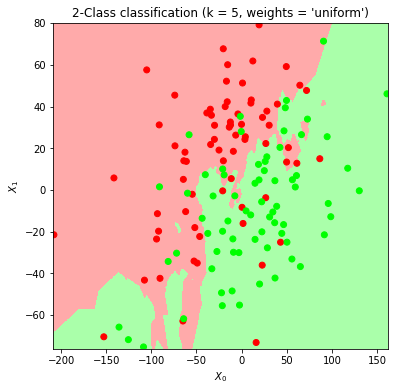

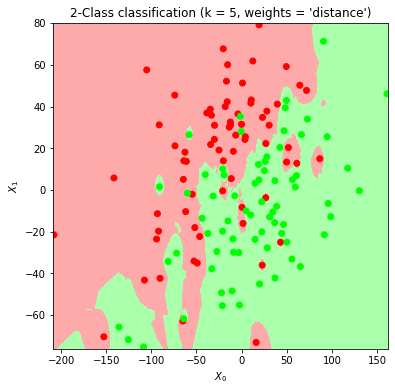

In [13]:
for weights in ['uniform', 'distance']:
    plotkNN(weights)

## Rozhodovací hranice

### Logistická regrese 

  * Logistická regrese je v `sklearn.linear_model` jako `LogisticRegression`.
  * Používá se pak klasicky dle obvyklého API modelů v `scikit-learn`.
  
  * U logistické regrese je hranice dána příslušnou nadrovinou.

In [6]:
from sklearn.linear_model import LogisticRegression

# ==================
# vas kod: 
# - provedte logistickou regresi
# - vypiste odhadnute w_1 a w_2 a intercept w_0, 
# - vypiste klasifikaci prvnich 10 bodu a prislusne pravdeposobnosti, na zaklade kterych bylo klasifikovano
# - vypiste trenovaci presnost klasifikace
# ==================

clfLOG = LogisticRegression(solver='newton-cg')
clfLOG.fit(X,y)
print('Koeficienty w_1 a w_2:', clfLOG.coef_)
print('Intercept w_0:', clfLOG.intercept_)

print('Klasifikace prvních 10 datových bodů:')
display(clfLOG.predict(X[:10,:]))
display(clfLOG.predict_proba(X[:10,:]))

print('Trénovací přesnost:', clfLOG.score(X,y))

Koeficienty w_1 a w_2: [[ 0.0225007  -0.04109694]]
Intercept w_0: [0.2244728]
Klasifikace prvních 10 datových bodů:


array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0])

array([[0.59545571, 0.40454429],
       [0.27288761, 0.72711239],
       [0.73735063, 0.26264937],
       [0.88453617, 0.11546383],
       [0.25395649, 0.74604351],
       [0.89524895, 0.10475105],
       [0.71489741, 0.28510259],
       [0.93032581, 0.06967419],
       [0.97265299, 0.02734701],
       [0.88073892, 0.11926108]])

Trénovací přesnost: 0.7857142857142857


Rozhodovací hranicí je přímka $w_0 + w_1 \cdot x + w_2 \cdot y = 0$

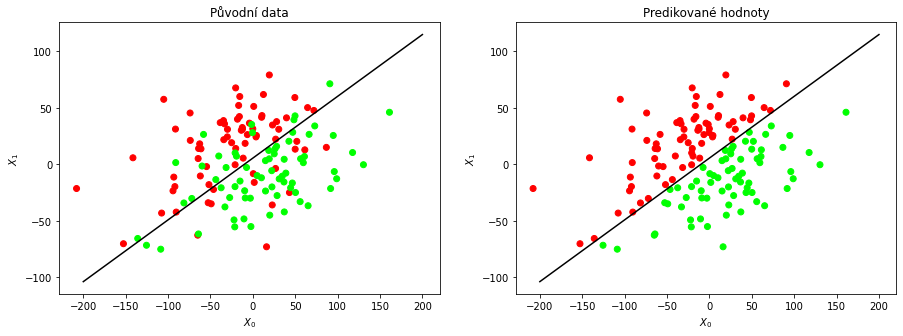

In [7]:
# ==================
# vas kod: 
# - vykreslete scatter plot nasich dat a rozhodovaci hranici (primku) pro nagenerovanou klasifikaci a nasi klasifikaci
# ==================

def fun(x, intercept, coef1, coef2):
    y = (-1/coef2)*(intercept + coef1*x)
    return y
# uděláme vektorovou funkci aby šlapala na ndarray
vfun = np.vectorize(fun)

xgrid = np.linspace(-200, 200, 200)
#plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
#plt.plot(xgrid, vfun(xgrid, clfLOG.intercept_, clfLOG.coef_[0,0], clfLOG.coef_[0,1]), 'k-')
#plt.show()
plt.figure(figsize=(15,5))
plt.subplot(121); plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold);
plt.plot(xgrid, vfun(xgrid, clfLOG.intercept_, clfLOG.coef_[0,0], clfLOG.coef_[0,1]), 'k-')
plt.xlabel('$X_0$'); plt.ylabel('$X_1$');
plt.title("Původní data")
plt.subplot(122); plt.scatter(X[:, 0], X[:, 1], c=clfLOG.predict(X), cmap=cmap_bold);
plt.plot(xgrid, vfun(xgrid, clfLOG.intercept_, clfLOG.coef_[0,0], clfLOG.coef_[0,1]), 'k-')
plt.xlabel('$X_0$'); plt.ylabel('$X_1$')
plt.title("Predikované hodnoty")
plt.show()

### srovnání s KNN

  * přikreslete k našemu KNN hranici získanou logistickou regresí

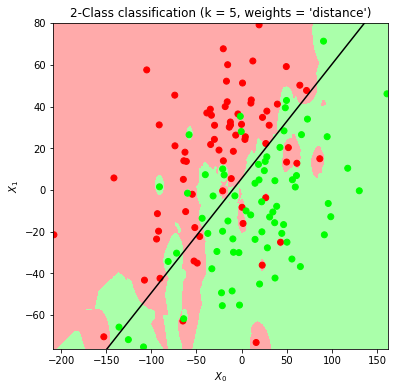

In [14]:
plotkNN('distance')
plt.plot(xgrid, vfun(xgrid, clfLOG.intercept_, clfLOG.coef_[0,0], clfLOG.coef_[0,1]), 'k-')

### Rozhodovací stromy

  * Pro srovnání se ještě podívejme na rozhodovací stromy

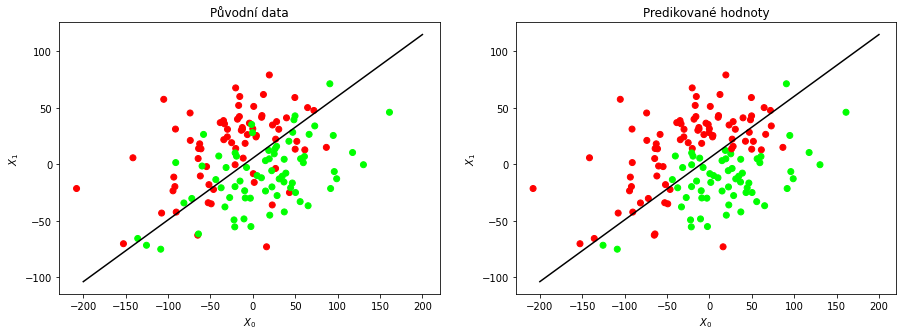

In [20]:
# ==================
# vas kod: 
# - provedte klasifikaci stromem (je na vas jakym) a zakreslete opet hranici z logisticke regrese
# ==================

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X, y)

plt.figure(figsize=(15,5))
plt.subplot(121); plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold);
plt.plot(xgrid, vfun(xgrid, clfLOG.intercept_, clfLOG.coef_[0,0], clfLOG.coef_[0,1]), 'k-')
plt.xlabel('$X_0$'); plt.ylabel('$X_1$');
plt.title("Původní data")
plt.subplot(122); plt.scatter(X[:, 0], X[:, 1], c=dt.predict(X), cmap=cmap_bold);
plt.plot(xgrid, vfun(xgrid, clfLOG.intercept_, clfLOG.coef_[0,0], clfLOG.coef_[0,1]), 'k-')
plt.xlabel('$X_0$'); plt.ylabel('$X_1$')
plt.title("Predikované hodnoty")
plt.show()

### Poznámka: Uložení výsledného modelu

* V případě přenesení naučeného modelu do produkce či prostě při potřebě uložení výsledků práce je dobré moci si uložit výsledný model do souboru, ze kterého jej lze později načíst.
* Lze využít balíček [pickle](https://docs.python.org/3/library/pickle.html#module-pickle).
* Pro složitější struktury lze použít [joblib](https://pypi.org/project/joblib/).

In [16]:
import os, pickle # package for serializing objects in Python
filename = 'clfLOG.sav'
pickle.dump(clfLOG, open(filename, 'wb')) # saving the model

clfLOG_loaded = pickle.load(open(filename, 'rb'))
print('Coeficients of original model:', clfLOG.coef_, clfLOG.intercept_)
print('Coefficients of loaded model:', clfLOG_loaded.coef_, clfLOG_loaded.intercept_)
print('Filesize: ', os.stat(filename).st_size, 'bytes')

Coeficients of original model: [[ 0.0225007  -0.04109694]] [0.2244728]
Coefficients of loaded model: [[ 0.0225007  -0.04109694]] [0.2244728]
Filesize:  728 bytes


## Parciální derivace a gradient

**Nepovinný Úkol**: Najděte gradient funkce $\ell(\mathbf{w})$ (viz přednášku):
$$
    \ell(\mathbf{w}) = \sum_{i = 1}^N \left(Y_i \ln \left( \frac{e^{\vec{w}^T \vec{x}}}{1 + e^{\vec{w}^T \vec{x}}} \right) + (1 - Y_i) \ln \left( \frac{1}{1 + e^{\vec{w}^T \vec{x}}} \right)\right).
$$
  * Pokuste se přepsat výsledek do maticového tvaru.
  * Projděte si [ukázku](https://courses.fit.cvut.cz/MI-MPI/media/tutorials/mpi-ukazka-1-parcialni-derivace-v1.pdf) z předmětu MI-MPI a pokuste se pochopit geometrickou interpretaci  parciální derivace a gradientu (příp. i Hessovy matice).
